In [1]:
import pandas as pd
import numpy as np
from libs import data_loading_maristany, functions, data_loading_generated
from libs.data_loading_generated import calculate_features_simulation, calculate_features_simulation_v2
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
import copy

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

from sklearn.metrics import mean_squared_error

import math

In [2]:
def clear_df(data_df):
    columns_to_drop = []
    for column_name in data_df.columns:
        if not isinstance(data_df.iloc[0][column_name], np.number) and column_name != "seq" and  not column_name.endswith("_T"):
            columns_to_drop.append(column_name)
    data_df = data_df.drop(labels=columns_to_drop, axis=1)
    data_df

In [3]:
N_COLS = 3

def plot_tests(model, Test, test_genes, columns_pred, title_name="Dense concentration"):
    
    N_ROWS = math.ceil(len(test_genes)/ N_COLS)
   
   

   
    # if N_ROWS==1:
    #     N_ROWS+=1
   
    r_n, c_n = 0, 0
    fig_h = 10 * N_ROWS
    fig, axes = plt.subplots(nrows=N_ROWS, ncols=N_COLS, figsize=(25, fig_h), squeeze=False)
    for i, gene_name in enumerate(test_genes):
        axes[r_n, c_n].scatter(Test[Test.gene == gene_name]["temp"],
                               Test[Test.gene == gene_name]["dense_conc"],
                               marker='o',
                               label ="True")
        axes[r_n, c_n].scatter(Test[Test.gene == gene_name]["temp"],
                               model.predict(Test[Test.gene==gene_name][columns_pred + ['temp']]),
                               marker='x',
                               label ="Predicted")
        
        axes[r_n, c_n].set_title(f"Gene {gene_name}")
        axes[r_n, c_n].set_xlabel("Temperature")
        axes[r_n, c_n].set_ylabel(f"{title_name}")
        axes[r_n, c_n].legend()
        c_n += 1
        if c_n >= 3:
            c_n=0
            r_n+=1
       
    
    fig.text(0.5, 0.04, "data", ha="center", va="center")
    fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
    fig.suptitle(f"Support Vector Regression for {title_name}", fontsize=14)
    plt.show()

In [6]:
data_df = calculate_features_simulation("configs/features_config.json", "data/FINISHED_SIMULATIONS/",
                                        calc_type='v3',
                                        dens_raw=False)
columns_to_drop = []
for column_name in data_df.columns:
    if not isinstance(data_df.iloc[0][column_name], np.number) and column_name != "seq" and  not column_name.endswith("_T"):
        columns_to_drop.append(column_name)
data_df = data_df.drop(labels=columns_to_drop, axis=1)

Skipping line due to IndexError:   8 0.15
Skipping line due to IndexError:   22
Skipping line due to IndexError:   25 0.49
Skipping line due to ValueError:   18 0.35 363.725 0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [7]:
temp_columns = [cn for cn in data_df.columns if cn.endswith("_T")]
ct_columns = [cn for cn in data_df.columns if cn == 'ct']
    
x_columns = [cn for cn in data_df.columns if cn not in temp_columns + ['seq'] + ct_columns]

In [8]:
data_df

,seq,170.0_T,190.0_T,200.0_T,205.0_T,210.0_T,215.0_T,ct,arginine_count(C),molecular_weight(BP),...,363.0_T,370.0_T,185.0_T,230.0_T,240.0_T,254.0_T,225.0_T,280.0_T,312.0_T,318.0_T
CCMM_SYNE7_-10s+10t,PPVIVRTTPAATADFHTTPTPTPLRPTTSEATTVTAYNGQGRLTTE...,"{'conc': {'dilute_conc': 9.68720511649155e-07,...",{'conc': {'dilute_conc': 2.6153428987040463e-0...,{'conc': {'dilute_conc': 8.243248329884717e-06...,{'conc': {'dilute_conc': 5.455603450586264e-06...,{'conc': {'dilute_conc': 0.0005501849107073831...,{'conc': {'dilute_conc': 0.0006545707243947007...,240.44,0.098765,8920.9116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCMM_SYNE7_-5t+5s,PPVIVRSTPAASADFHSSPSPSPLRPSSSEATSVSAYNGQGRLSSE...,{'conc': {'dilute_conc': 1.0868564561940133e-0...,{'conc': {'dilute_conc': 3.2212674108638426e-0...,"{'conc': {'dilute_conc': 2.78058810720268e-06,...",{'conc': {'dilute_conc': 8.049318622524386e-06...,{'conc': {'dilute_conc': 0.0003479054894807370...,NaN,238.64,0.098765,8710.5126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CEP3_-5S+5T,MGLSFTGARPCCCRNNVLITDDGEVVSLTAHDFDVVDIETEEEGNF...,NaN,"{'conc': {'dilute_conc': 0.017187570704742458,...","{'conc': {'dilute_conc': 0.032879411220571614,...",NaN,NaN,"{'conc': {'dilute_conc': 0.09697021206664574, ...",249.84,0.104167,10556.6494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CEP3_HHV11_P04289_Wildtype_2024_08_11_12_08_1723378473,MGLSFSGARPCCCRNNVLITDDGEVVSLTAHDFDVVDIESEEEGNF...,NaN,{'conc': {'dilute_conc': 2.5174886363636364e-0...,{'conc': {'dilute_conc': 1.8030312430011199e-0...,NaN,{'conc': {'dilute_conc': 8.401170918367346e-07...,NaN,250.10,0.104167,10486.5164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CGAS_-5Q+5N,MQPWHGKAMNRASEAGATAPKASARNARGAPMDPTESPAAPEAALP...,"{'conc': {'dilute_conc': 0.0, 'dense_conc': 0....",{'conc': {'dilute_conc': 0.0028438205892776383...,"{'conc': {'dilute_conc': 0.08223138588301507, ...",NaN,NaN,NaN,216.44,0.100671,15267.9303,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EWSR1_-10G+10T_2024_08_06_12_08_1722948037,MASTDYSTYSQAAAQQTYSAYTAQPTQGYAQTTQAYGQQSYTTYGQ...,NaN,NaN,NaN,NaN,NaN,NaN,341.25,0.007143,30157.2626,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRGDSPYQ_2024_08_15_19_08_1723750361,PGRGDSPYQGRGDSPYQGRGDSPYQGRGDSPYQG,NaN,NaN,NaN,NaN,NaN,NaN,328.06,0.117647,3615.6642,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRGDSPY_2024_08_15_11_08_1723721784,PGRGDSPYGRGDSPYGRGDSPYGRGDSPYG,NaN,NaN,NaN,NaN,NaN,NaN,307.07,0.133333,3103.1474,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I0FUN3_MACMU_-10Q+10N_2024_08_17_01_08_1723858279,VQNQNQIGYPNPYGQWGNWYGNANQIGNYMPNGWQVPAYGMYGNAW...,NaN,NaN,NaN,NaN,NaN,NaN,382.61,0.010753,10279.9486,...,"{'conc': {'dilute_conc': 0.04859119864111842, ...","{'conc': {'dilute_conc': 0.20495688342105262, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I0FUN3_MACMU_-15Q+15N_2024_08_17_04_08_1723867994,VNNQNQIGYPNPYGNWGNWYGNANQIGNYMPNGWNVPAYGMYGNAW...,NaN,NaN,NaN,NaN,NaN,NaN,372.74,0.010753,10209.8156,...,"{'conc': {'dilute_conc': 0.11601076743980263, ...","{'conc': {'dilute_conc': 0.15053847059210526, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
new_rows = []
for gene_name, row in data_df.iterrows():
    for temp_column_name in temp_columns:
       if not pd.isna(row[temp_column_name]): 
           new_rows.append(pd.concat([pd.Series({"gene": gene_name}),
                                   row[x_columns + ct_columns],
                                   pd.Series({"temp": temp_column_name.split("_")[0], **row[temp_column_name]['conc']})]))
data_df_ext = pd.DataFrame(new_rows)
del data_df_ext['charge_segregation_kappa(S)']
x_columns.remove('charge_segregation_kappa(S)')
data_df_ext["temp"] = data_df_ext["temp"].astype(float)

In [11]:
data_df_ext

,gene,arginine_count(C),molecular_weight(BP),isoelectric_pint(BP),aromaticity(BP),net_charge(BP),hydropathy_index(BP),length(BP),instability_index(BP),fraction_of_charged_residues(S),...,end_to_end_distance(SP),asphericity(SP),scaling_exponent(SP),prefactor(SP),ct,temp,dilute_conc,dense_conc,var_dilute,var_dense
0,CCMM_SYNE7_-10s+10t,0.098765,8920.9116,10.253004,0.061728,4.130572,-0.602469,81,25.098765,0.172840,...,62.526837,0.416176,0.539948,6.696292,240.44,170.0,9.687205e-07,0.407493,0.000003,0.348657
1,CCMM_SYNE7_-10s+10t,0.098765,8920.9116,10.253004,0.061728,4.130572,-0.602469,81,25.098765,0.172840,...,62.526837,0.416176,0.539948,6.696292,240.44,190.0,2.615343e-06,0.368057,0.000009,0.304093
2,CCMM_SYNE7_-10s+10t,0.098765,8920.9116,10.253004,0.061728,4.130572,-0.602469,81,25.098765,0.172840,...,62.526837,0.416176,0.539948,6.696292,240.44,200.0,8.243248e-06,0.345748,0.000016,0.278036
3,CCMM_SYNE7_-10s+10t,0.098765,8920.9116,10.253004,0.061728,4.130572,-0.602469,81,25.098765,0.172840,...,62.526837,0.416176,0.539948,6.696292,240.44,205.0,5.455603e-06,0.325992,0.000012,0.269234
4,CCMM_SYNE7_-10s+10t,0.098765,8920.9116,10.253004,0.061728,4.130572,-0.602469,81,25.098765,0.172840,...,62.526837,0.416176,0.539948,6.696292,240.44,210.0,5.501849e-04,0.308180,0.000115,0.257561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,UBP4_Q13107_Wildtype_2024_08_16_19_08_1723837452,0.035714,8610.0823,8.390061,0.059524,1.116912,-0.817857,84,76.186905,0.107143,...,64.452063,0.418544,0.542213,6.320558,270.00,250.0,1.664644e-01,0.251682,0.019745,0.030198
275,UBP4_Q13107_Wildtype_2024_08_16_19_08_1723837452,0.035714,8610.0823,8.390061,0.059524,1.116912,-0.817857,84,76.186905,0.107143,...,64.452063,0.418544,0.542213,6.320558,270.00,270.0,2.250076e-01,0.224132,0.011413,0.012883
276,VPHSRNGGNSGGRGDSPYG_2024_08_16_17_08_1723830847,0.102564,7583.6922,10.379619,0.051282,4.307633,-1.451282,78,64.302564,0.153846,...,57.970909,0.415642,0.528080,6.399042,286.47,250.0,1.519061e-02,0.282784,0.004751,0.217518
277,VPHSRNGGNSGGRGDSPYG_2024_08_16_17_08_1723830847,0.102564,7583.6922,10.379619,0.051282,4.307633,-1.451282,78,64.302564,0.153846,...,57.970909,0.415642,0.528080,6.399042,286.47,270.0,1.157935e-01,0.282664,0.014688,0.061425


In [12]:
scaler = StandardScaler()
normalizer = Normalizer()

In [13]:
data_df_ext_scaled = data_df_ext.copy(deep=True)
corr_matrix = data_df_ext[x_columns].corr().abs()
cols_to_del = []
for name, row in corr_matrix.iterrows():
    if name not in cols_to_del:
        for c, v in row.items():
            if v > 0.9 and name != c:
                print(name, c, v)
                cols_to_del.append(c)
shr_cols = [col for col in x_columns if col not in cols_to_del]

arginine_count(C) fraction_of_charged_residues(S) 0.9826005757865147
arginine_count(C) fraction_of_positive_residues(S) 0.9358709151413385
arginine_count(C) fraction_of_negative_residues(S) 0.923596996104371
molecular_weight(BP) length(BP) 0.9892128691377994
aromaticity(BP) asphericity(SP) 0.9095442648507004
net_charge(BP) net_charge_per_residue(S) 0.9770392065053336
hydropathy_index(BP) hydrophobicity(S) 1.0000000000000002
radius_of_gyration(SP) end_to_end_distance(SP) 0.9930593530937419
scaling_exponent(SP) asphericity(SP) 0.9834289674093873


In [14]:
scaler.fit(data_df_ext[shr_cols + ["temp"]])
data_df_ext_scaled = data_df_ext.copy(deep=True)
data_df_ext_scaled[shr_cols + ["temp"]] = scaler.transform(data_df_ext[shr_cols + ["temp"]])

In [15]:
shr_cols

['arginine_count(C)',
 'molecular_weight(BP)',
 'isoelectric_pint(BP)',
 'aromaticity(BP)',
 'net_charge(BP)',
 'hydropathy_index(BP)',
 'instability_index(BP)',
 'sequence_charge_decoration_1(S)',
 'sequence_charge_decoration_2(S)',
 'fraction_aliphatic(S)',
 'fraction_polar(S)',
 'fraction_proline(S)',
 'complexity(S)',
 'compute_iwd_charged_weighted_+(S)',
 'compute_iwd_charged_weighted_-(S)',
 'compute_bivariate_iwd_charged_weighted(S)',
 'radius_of_gyration(SP)',
 'scaling_exponent(SP)',
 'prefactor(SP)']

In [16]:
data_df_ext_scaled

,gene,arginine_count(C),molecular_weight(BP),isoelectric_pint(BP),aromaticity(BP),net_charge(BP),hydropathy_index(BP),length(BP),instability_index(BP),fraction_of_charged_residues(S),...,end_to_end_distance(SP),asphericity(SP),scaling_exponent(SP),prefactor(SP),ct,temp,dilute_conc,dense_conc,var_dilute,var_dense
0,CCMM_SYNE7_-10s+10t,1.438493,-0.528398,1.407806,-1.342957,0.708492,1.223323,81,-0.781229,0.172840,...,62.526837,0.416176,1.239306,-1.043074,240.44,-1.965821,9.687205e-07,0.407493,0.000003,0.348657
1,CCMM_SYNE7_-10s+10t,1.438493,-0.528398,1.407806,-1.342957,0.708492,1.223323,81,-0.781229,0.172840,...,62.526837,0.416176,1.239306,-1.043074,240.44,-1.613145,2.615343e-06,0.368057,0.000009,0.304093
2,CCMM_SYNE7_-10s+10t,1.438493,-0.528398,1.407806,-1.342957,0.708492,1.223323,81,-0.781229,0.172840,...,62.526837,0.416176,1.239306,-1.043074,240.44,-1.436807,8.243248e-06,0.345748,0.000016,0.278036
3,CCMM_SYNE7_-10s+10t,1.438493,-0.528398,1.407806,-1.342957,0.708492,1.223323,81,-0.781229,0.172840,...,62.526837,0.416176,1.239306,-1.043074,240.44,-1.348638,5.455603e-06,0.325992,0.000012,0.269234
4,CCMM_SYNE7_-10s+10t,1.438493,-0.528398,1.407806,-1.342957,0.708492,1.223323,81,-0.781229,0.172840,...,62.526837,0.416176,1.239306,-1.043074,240.44,-1.260469,5.501849e-04,0.308180,0.000115,0.257561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,UBP4_Q13107_Wildtype_2024_08_16_19_08_1723837452,-0.181902,-0.601306,0.394844,-1.384558,-0.171772,0.689049,84,1.666734,0.107143,...,64.452063,0.418544,1.266032,-1.256350,270.00,-0.555117,1.664644e-01,0.251682,0.019745,0.030198
275,UBP4_Q13107_Wildtype_2024_08_16_19_08_1723837452,-0.181902,-0.601306,0.394844,-1.384558,-0.171772,0.689049,84,1.666734,0.107143,...,64.452063,0.418544,1.266032,-1.256350,270.00,-0.202441,2.250076e-01,0.224132,0.011413,0.012883
276,VPHSRNGGNSGGRGDSPYG_2024_08_16_17_08_1723830847,1.536117,-0.842057,1.476652,-1.540084,0.760210,-0.882174,78,1.097278,0.153846,...,57.970909,0.415642,1.099225,-1.211801,286.47,-0.555117,1.519061e-02,0.282784,0.004751,0.217518
277,VPHSRNGGNSGGRGDSPYG_2024_08_16_17_08_1723830847,1.536117,-0.842057,1.476652,-1.540084,0.760210,-0.882174,78,1.097278,0.153846,...,57.970909,0.415642,1.099225,-1.211801,286.47,-0.202441,1.157935e-01,0.282664,0.014688,0.061425


In [85]:
genelist = data_df_ext_scaled["gene"].unique()
Train, Test = train_test_split(genelist, train_size=0.8, random_state=1, shuffle=True)

train_genes = copy.deepcopy(Train)
test_genes = copy.deepcopy(Test)

Train = data_df_ext_scaled[data_df_ext_scaled['gene'].isin(Train)]
Test = data_df_ext_scaled[data_df_ext_scaled['gene'].isin(Test)]

X_train = Train[shr_cols+["temp"]]
X_test = Test[shr_cols+["temp"]]
y_train = Train["dense_conc"]
y_test = Test["dense_conc"]

In [86]:
svr_rbf = SVR(C=100, coef0=0.01, epsilon=0.001, gamma='auto', max_iter=20000)
svr_rbf.fit(X_train, y_train)

C:\Users\suvcss\Anaconda3\envs\chemistry\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVR(C=100, coef0=0.01, epsilon=0.001, gamma='auto', max_iter=20000)

In [87]:
svr_rbf.score(X_train, y_train)

0.962191452739532

In [88]:
svr_rbf.score(X_test, y_test)

0.11435630021770293

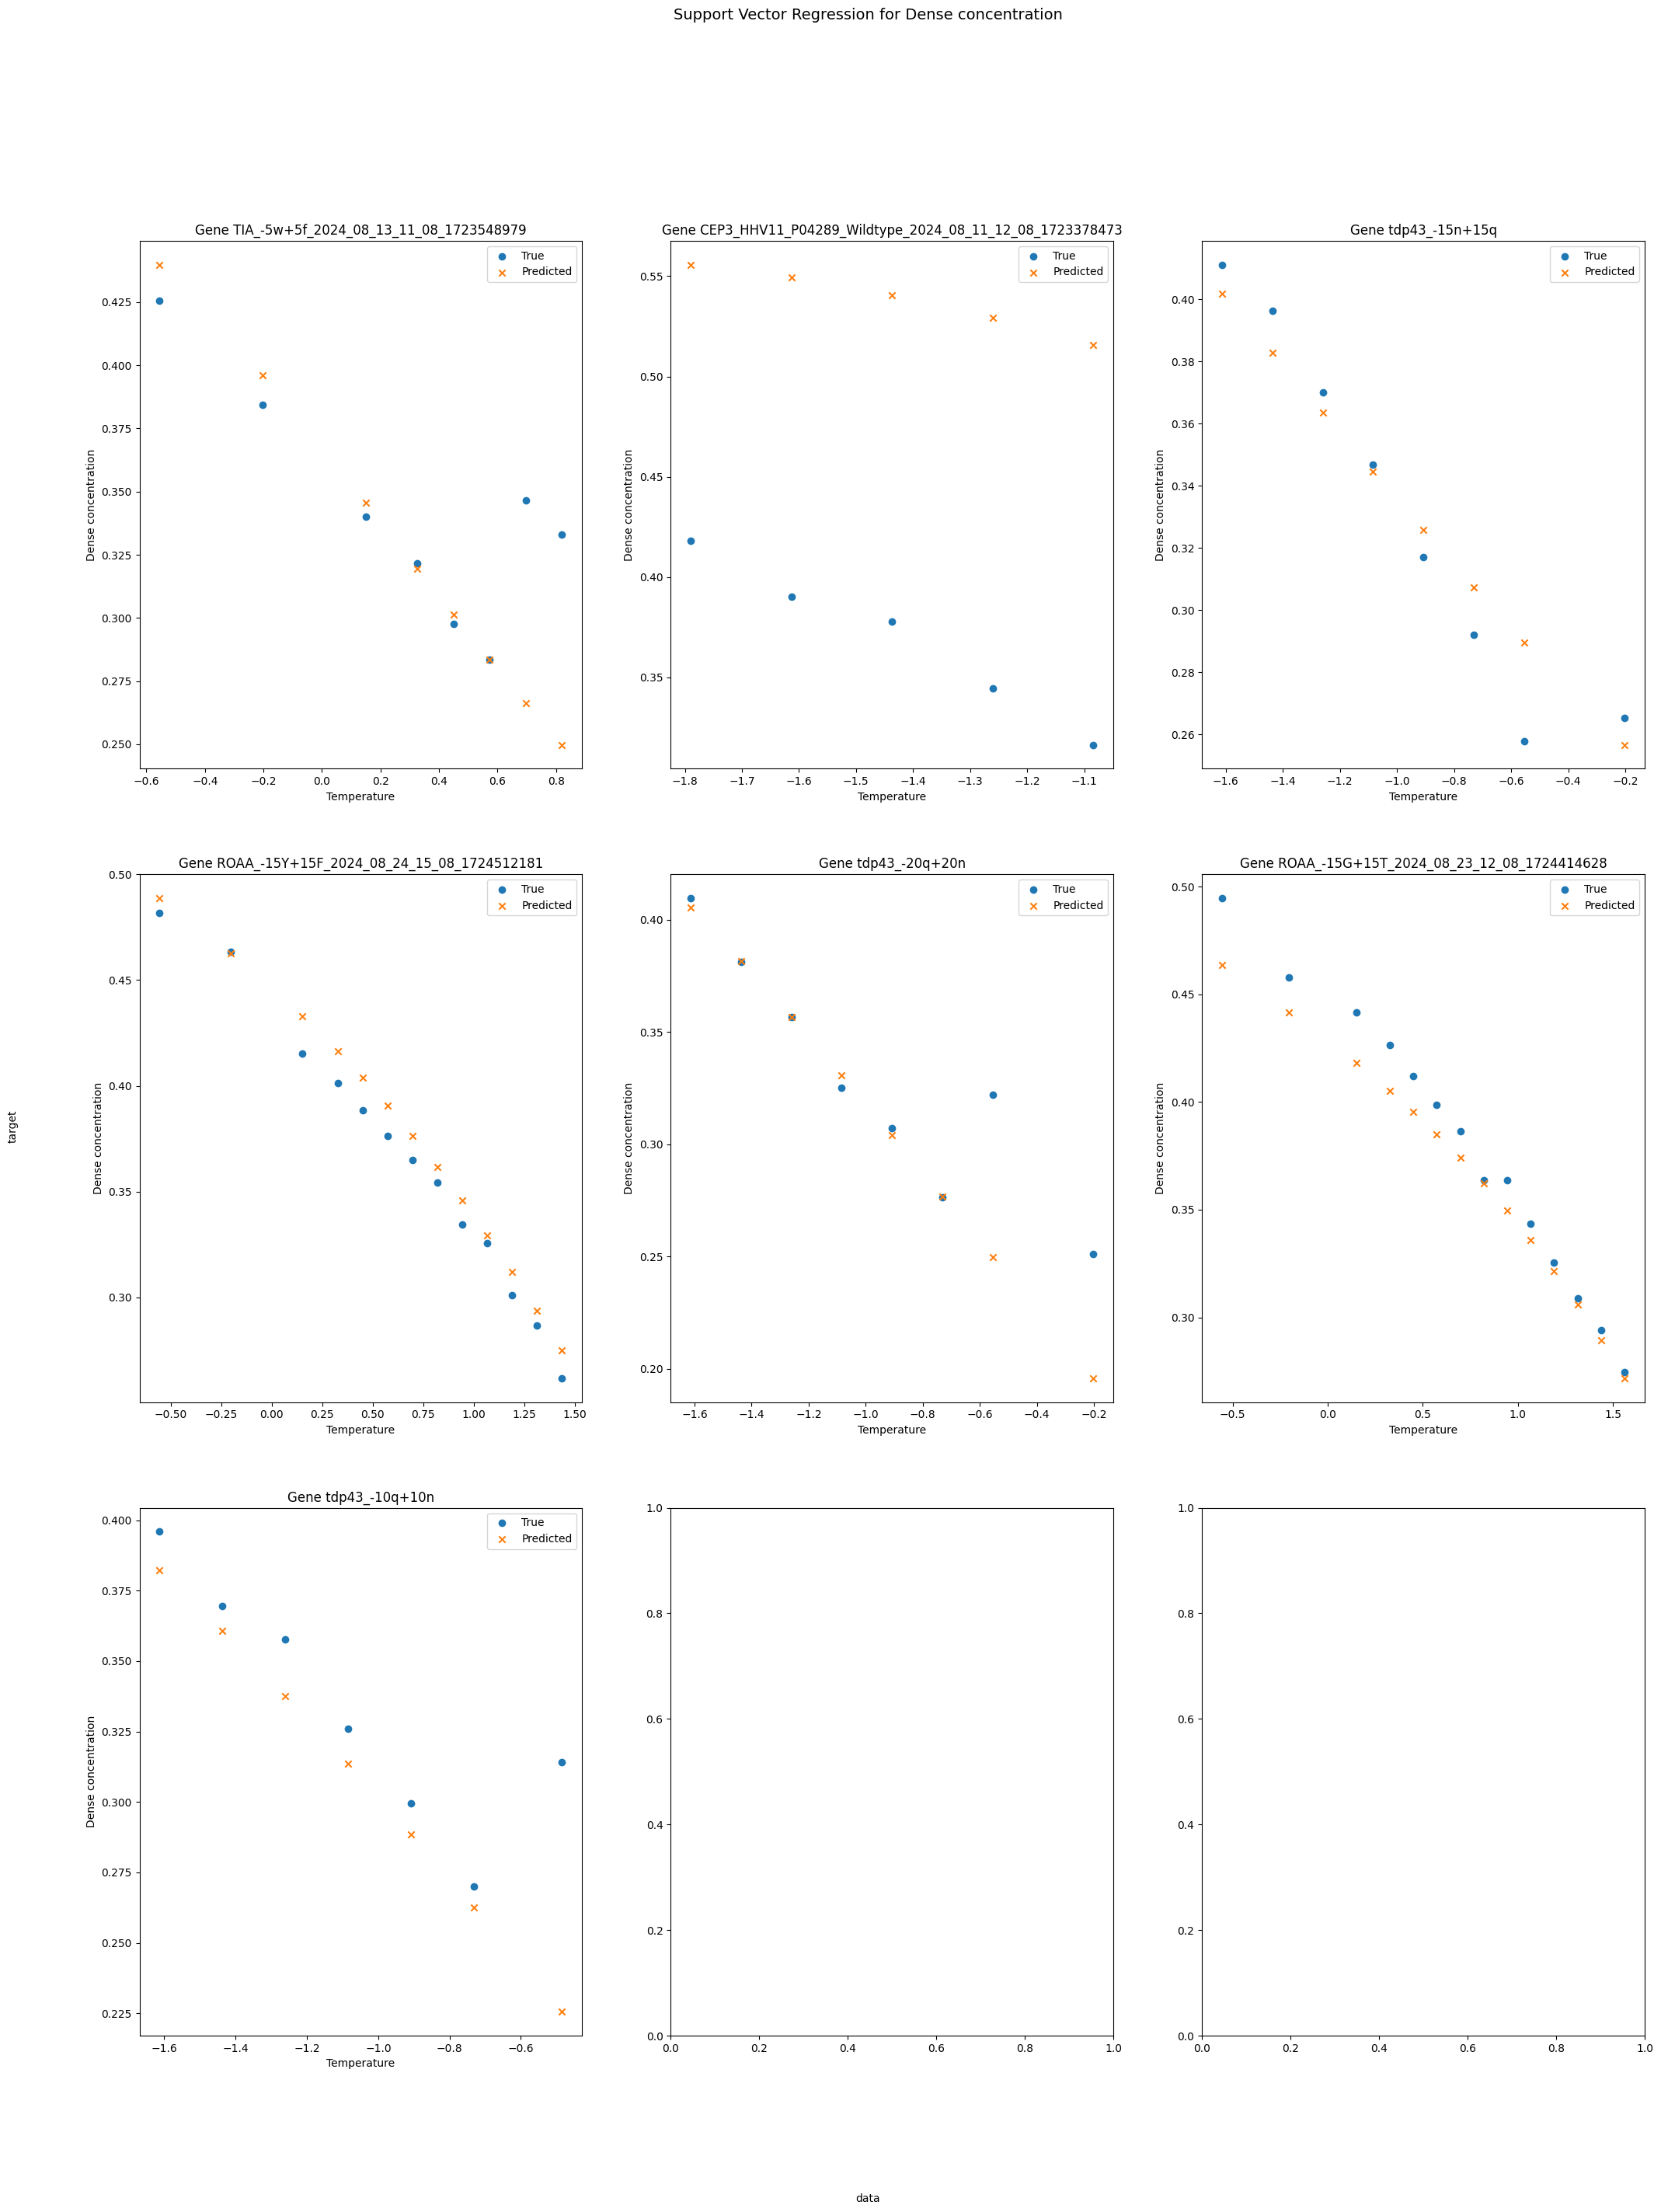

<Figure size 640x480 with 0 Axes>

In [92]:
plot_tests(svr_rbf, Test, test_genes, shr_cols)
plt.savefig('dense_conc.png')

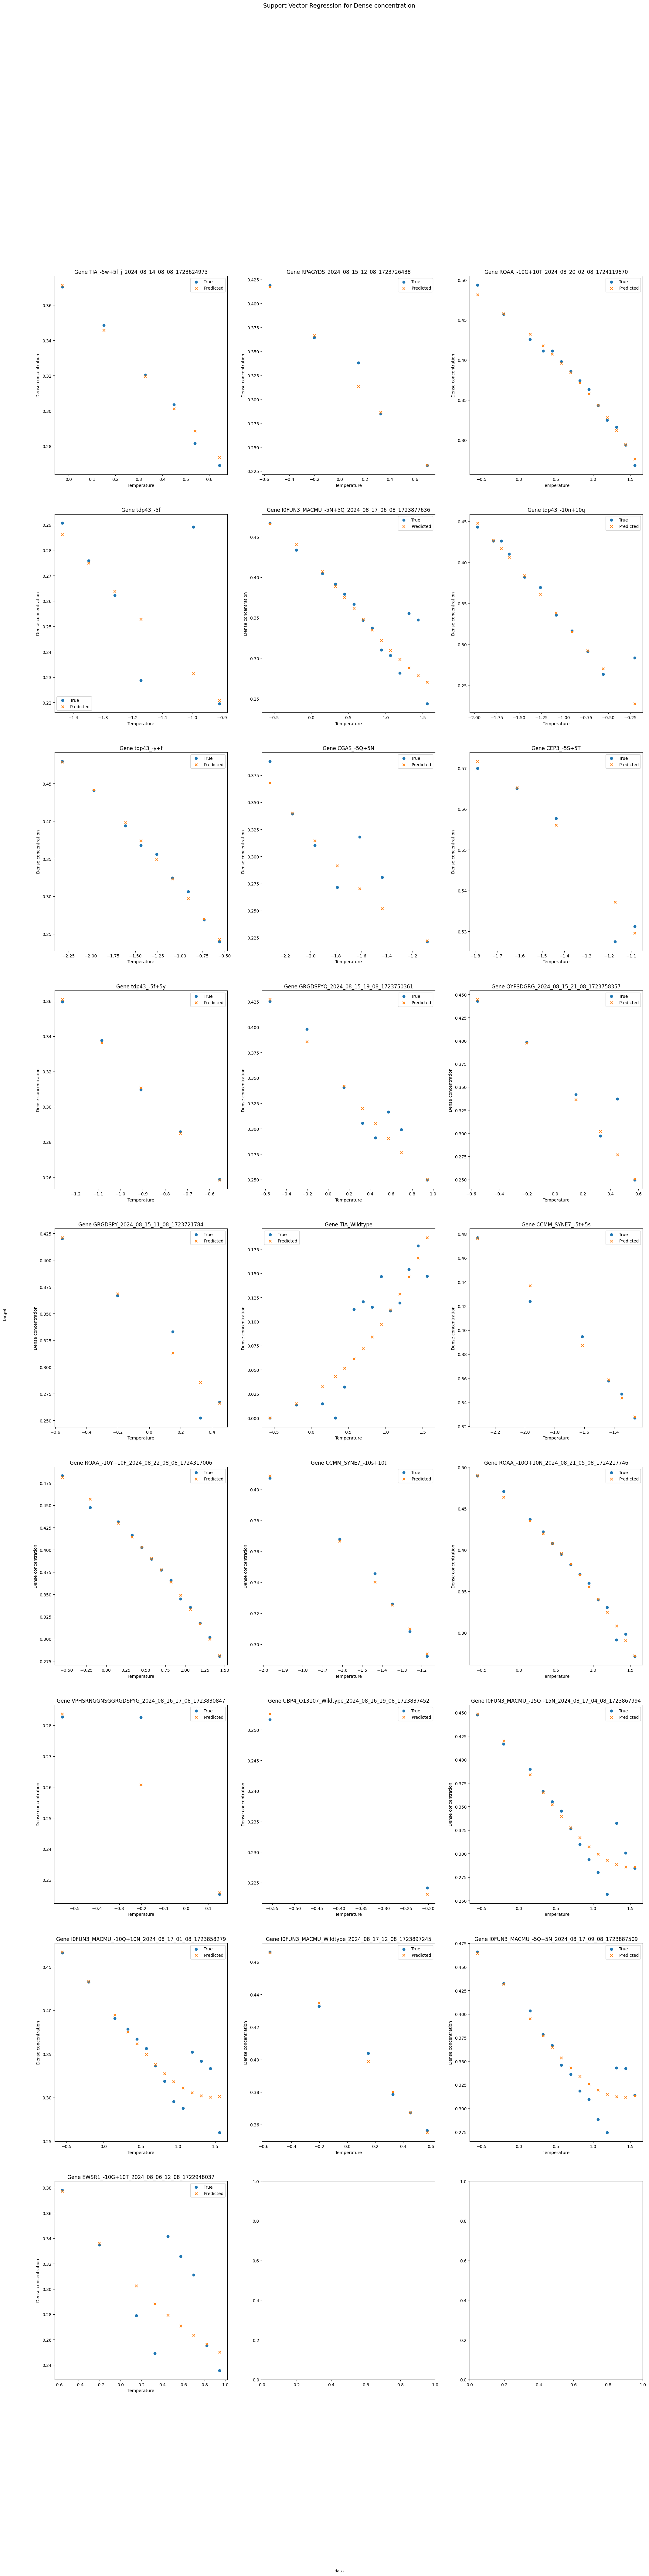

<Figure size 640x480 with 0 Axes>

In [93]:
plot_tests(svr_rbf, Train, train_genes, shr_cols)
plt.savefig('dense_conc.png')

In [37]:
for i in range(10):
    genelist = data_df_ext_scaled["gene"].unique()
    Train, Test = train_test_split(genelist, train_size=0.8, shuffle=True)
    
    train_genes = copy.deepcopy(Train)
    test_genes = copy.deepcopy(Test)
    
    Train = data_df_ext_scaled[data_df_ext_scaled['gene'].isin(Train)]
    Test = data_df_ext_scaled[data_df_ext_scaled['gene'].isin(Test)]
    
    X_train = Train[shr_cols+["temp"]]
    X_test = Test[shr_cols+["temp"]]
    y_train = Train["dense_conc"]
    y_test = Test["dense_conc"]

    svr_rbf = SVR(C=1, coef0=0.01, epsilon=0.001, gamma='auto', max_iter=10000)
    svr_rbf.fit(X_train, y_train)

    print(f"Train score {svr_rbf.score(X_train, y_train)}")
    print(f"Ttain RMSE {mean_squared_error(svr_rbf.predict(X_train), y_train)}")
    print(f"Test score {svr_rbf.score(X_test, y_test)}")
    print(f"Test RMSE {mean_squared_error(svr_rbf.predict(X_test), y_test)}")
    print()

Train score 0.7787721628287348
Ttain RMSE 0.0017041631345985492
Test score -1.4313719680937784
Test RMSE 0.018469986775506618

Train score 0.7305736513287445
Ttain RMSE 0.0023501986040351808
Test score 0.5520647155013036
Test RMSE 0.0017671591354291689

Train score 0.6972224921438147
Ttain RMSE 0.002339885165105172
Test score 0.4576462945578953
Test RMSE 0.003835320587232408

Train score 0.7275624717578077
Ttain RMSE 0.0024167095012295487
Test score 0.7516782799126481
Test RMSE 0.0008789525160354863

Train score 0.6958452709910796
Ttain RMSE 0.0023413328735298615
Test score 0.44465339915367075
Test RMSE 0.003413207029299946

Train score 0.7362419249917618
Ttain RMSE 0.0022800539881801377
Test score 0.6751097999434094
Test RMSE 0.0012608808116072632

Train score 0.7403201675854145
Ttain RMSE 0.0024043822000750655
Test score 0.7450806506316143
Test RMSE 0.0008311423938153408

Train score 0.7070947156519486
Ttain RMSE 0.002505520769034486
Test score 0.8203492232540525
Test RMSE 0.00083465

In [38]:
for i in range(10):
    genelist = data_df_ext_scaled["gene"].unique()
    Train, Test = train_test_split(genelist, train_size=0.8, shuffle=True)
    
    train_genes = copy.deepcopy(Train)
    test_genes = copy.deepcopy(Test)
    
    Train = data_df_ext_scaled[data_df_ext_scaled['gene'].isin(Train)]
    Test = data_df_ext_scaled[data_df_ext_scaled['gene'].isin(Test)]
    
    X_train = Train[shr_cols+["temp"]]
    X_test = Test[shr_cols+["temp"]]
    y_train = Train["dense_conc"]
    y_test = Test["dense_conc"]

    svr_rbf = SVR(C=1, coef0=0.01, epsilon=0.001, gamma='auto', max_iter=10000)
    svr_rbf.fit(X_train, y_train)

    print(f"Train score {svr_rbf.score(X_train, y_train)}")
    print(f"Ttain RMSE {mean_squared_error(svr_rbf.predict(X_train), y_train)}")
    print(f"Test score {svr_rbf.score(X_test, y_test)}")
    print(f"Test RMSE {mean_squared_error(svr_rbf.predict(X_test), y_test)}")
    print()

Train score 0.7403707747210205
Ttain RMSE 0.0022302648379658877
Test score 0.38594003345505257
Test RMSE 0.0019818546617467463

Train score 0.9263411729719674
Ttain RMSE 0.00035258586699404653
Test score -0.20295957999867542
Test RMSE 0.017943625707206735

Train score 0.74487594831699
Ttain RMSE 0.002251629810263174
Test score -0.2145498287596872
Test RMSE 0.003947191400981415

Train score 0.731425991111106
Ttain RMSE 0.0020279514047522452
Test score 0.44359947846506853
Test RMSE 0.0037625848615967503

Train score 0.8013574788642972
Ttain RMSE 0.0017417916691385613
Test score -1.4843661753509636
Test RMSE 0.00881496512841631

Train score 0.9231448330408004
Ttain RMSE 0.0003643876996414873
Test score -0.06514756390804677
Test RMSE 0.015898064257456265

Train score 0.7421332537123377
Ttain RMSE 0.0022535905556763723
Test score 0.4246673176084863
Test RMSE 0.0018458350747580122

Train score 0.7235433303790859
Ttain RMSE 0.0023571959459278554
Test score -0.12646120544753447
Test RMSE 0.003

In [39]:
genelist = data_df_ext_scaled["gene"].unique()
Train, Test = train_test_split(genelist, train_size=0.8, random_state=1, shuffle=True)

train_genes = copy.deepcopy(Train)
test_genes = copy.deepcopy(Test)

Train = data_df_ext_scaled[data_df_ext_scaled['gene'].isin(Train)]
Test = data_df_ext_scaled[data_df_ext_scaled['gene'].isin(Test)]

X_train = Train[shr_cols+["temp"]]
X_test = Test[shr_cols+["temp"]]
y_train = Train["dilute_conc"]
y_test = Test["dilute_conc"]

In [40]:
svr_rbf = SVR(C=1, coef0=0.01, epsilon=0.001, gamma='auto', max_iter=10000)
svr_rbf.fit(X_train, y_train)

SVR(C=1, coef0=0.01, epsilon=0.001, gamma='auto', max_iter=10000)

In [41]:
svr_rbf.score(X_train, y_train)

0.4156716675824016

In [42]:
svr_rbf.score(X_test, y_test)

-0.22190786570386134

In [43]:
N_COLS = 3

def plot_tests_d(model, Test, test_genes, columns_pred, title_name="Dilute concentration"):
    
    N_ROWS = math.ceil(len(test_genes)/ N_COLS)
   
   

   
    # if N_ROWS==1:
    #     N_ROWS+=1
   
    r_n, c_n = 0, 0
    fig_h = 10 * N_ROWS
    fig, axes = plt.subplots(nrows=N_ROWS, ncols=N_COLS, figsize=(25, fig_h), squeeze=False)
    for i, gene_name in enumerate(test_genes):
        axes[r_n, c_n].scatter(Test[Test.gene == gene_name]["temp"],
                               Test[Test.gene == gene_name]["dilute_conc"],
                               marker='o',
                               label ="True")
        axes[r_n, c_n].scatter(Test[Test.gene == gene_name]["temp"],
                               model.predict(Test[Test.gene==gene_name][columns_pred + ['temp']]),
                               marker='x',
                               label ="Predicted")
        
        axes[r_n, c_n].set_title(f"Gene {gene_name}")
        axes[r_n, c_n].set_xlabel("Temperature")
        axes[r_n, c_n].set_ylabel(f"{title_name}")
        axes[r_n, c_n].legend()
        c_n += 1
        if c_n >= 3:
            c_n=0
            r_n+=1
       
    
    fig.text(0.5, 0.04, "data", ha="center", va="center")
    fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
    fig.suptitle(f"Support Vector Regression for {title_name}", fontsize=14)
    plt.show()

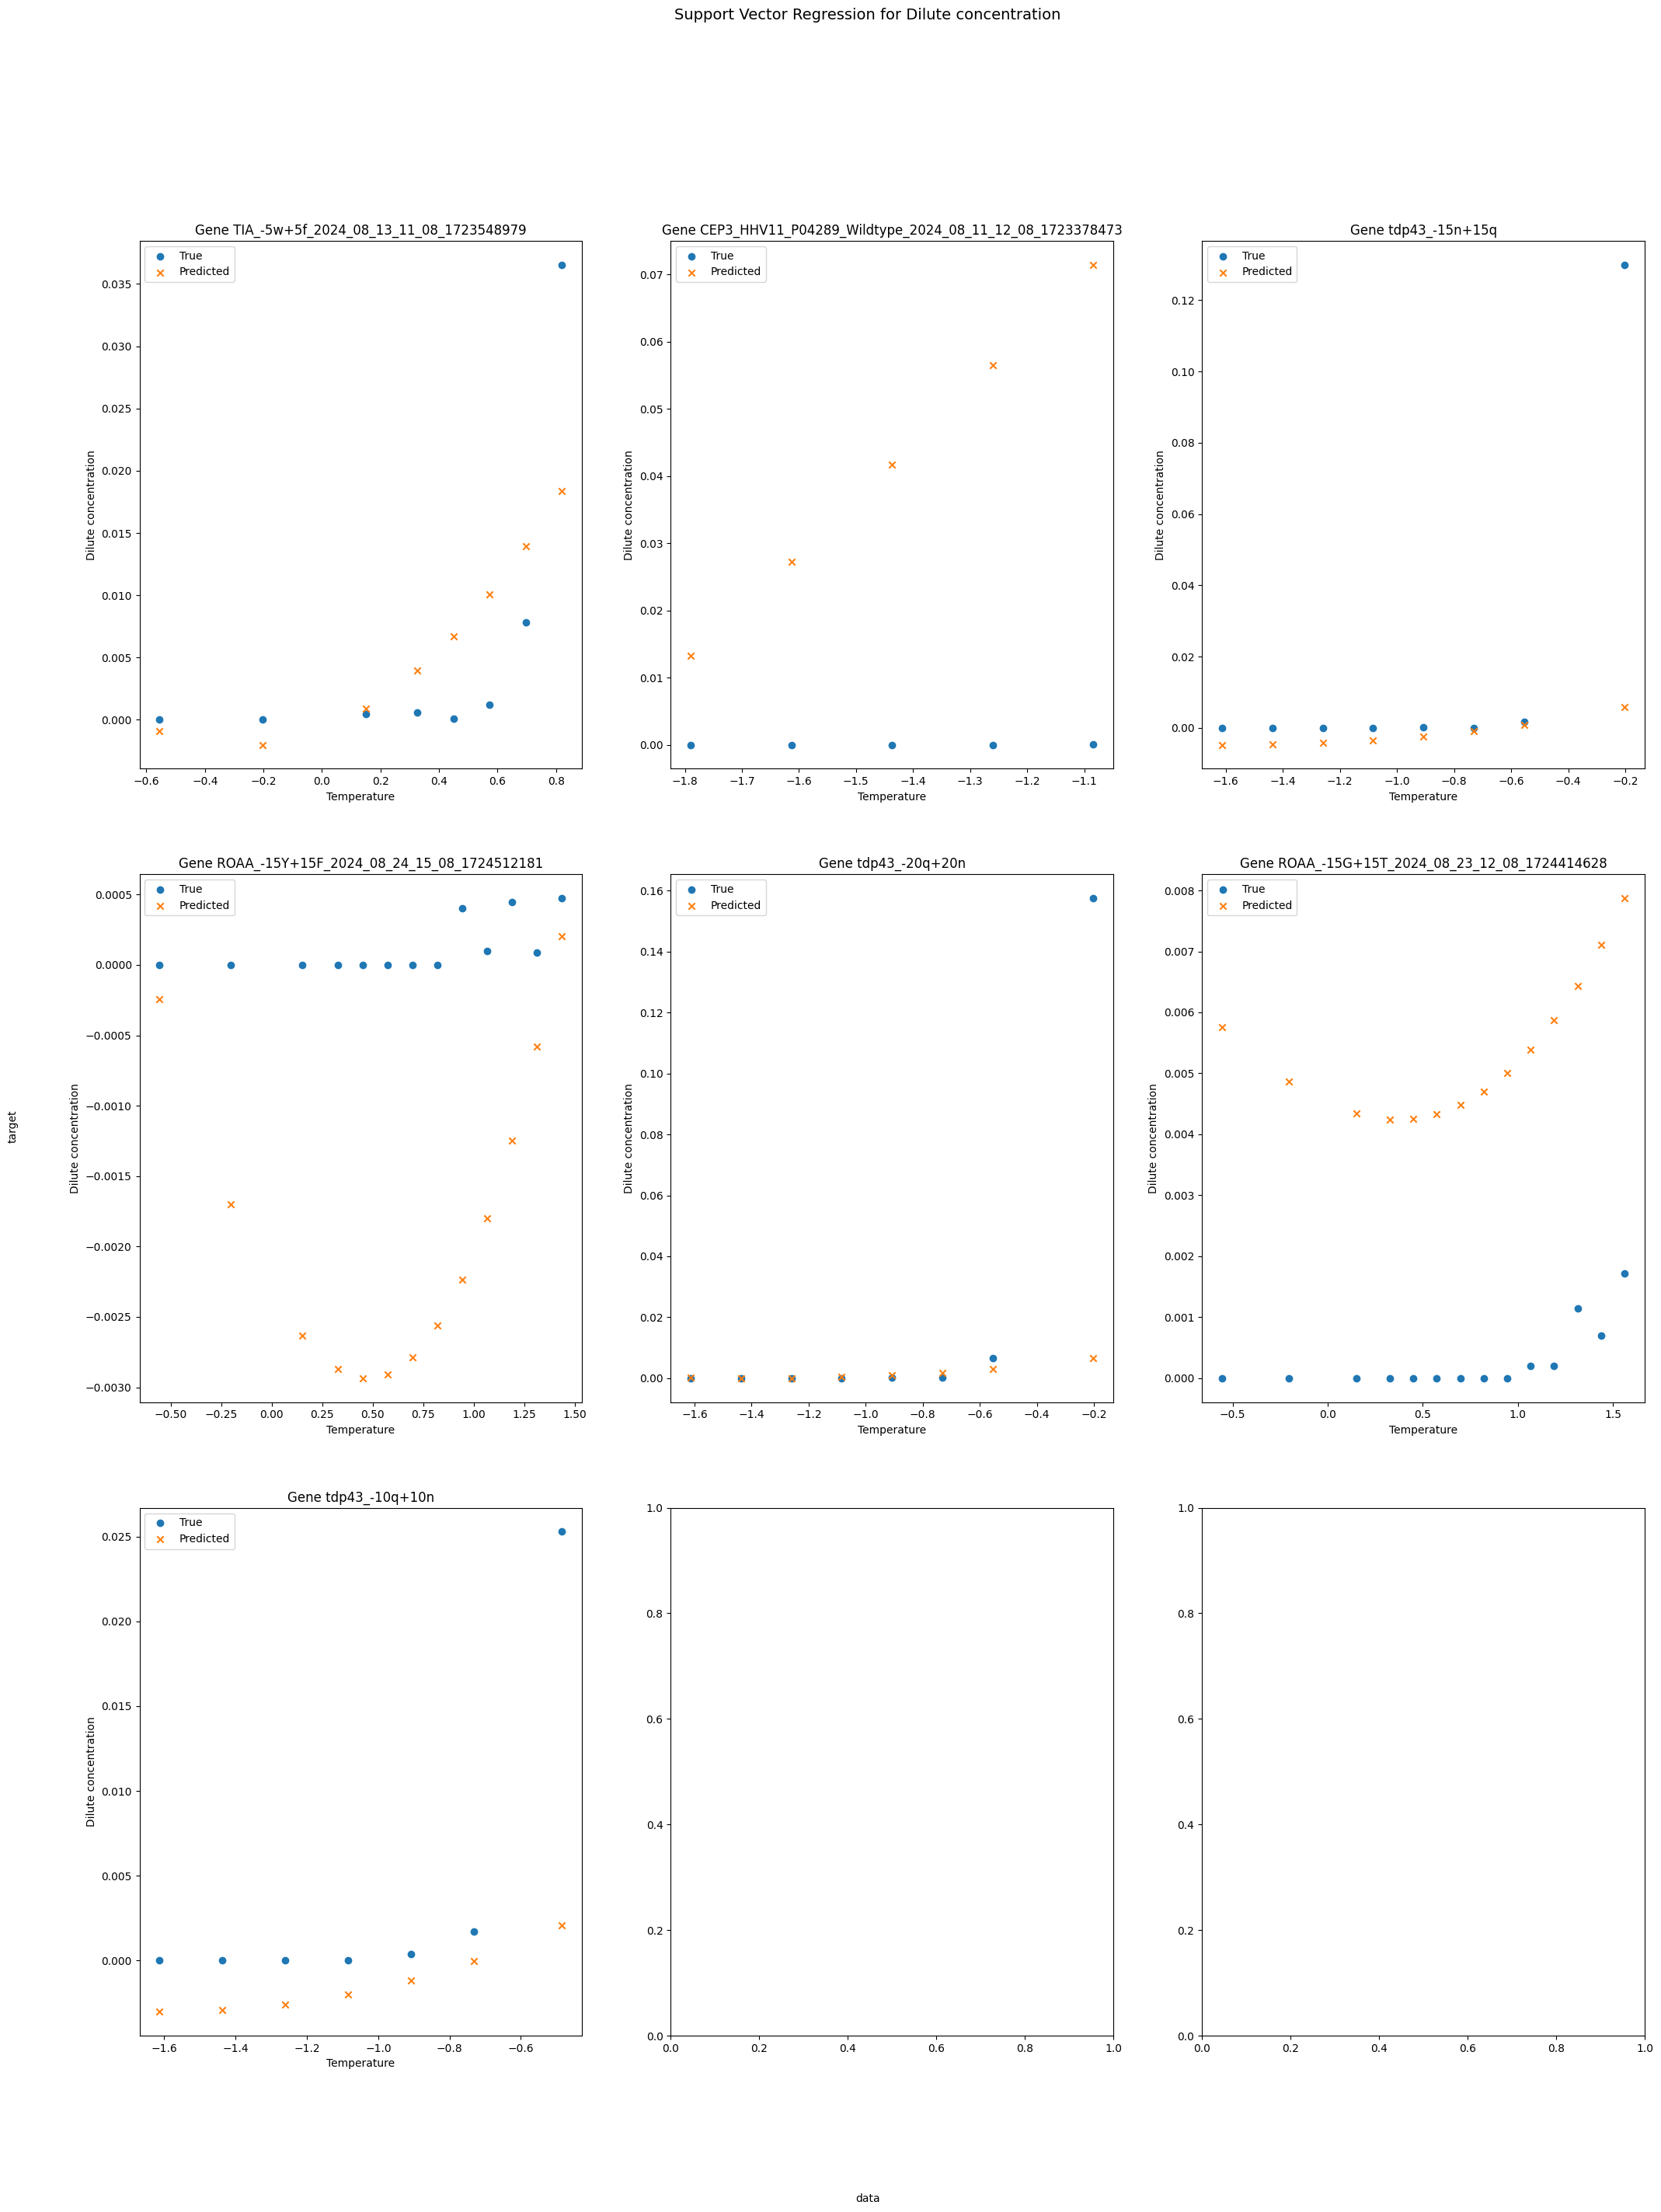

In [44]:
plot_tests_d(svr_rbf, Test, test_genes, shr_cols)

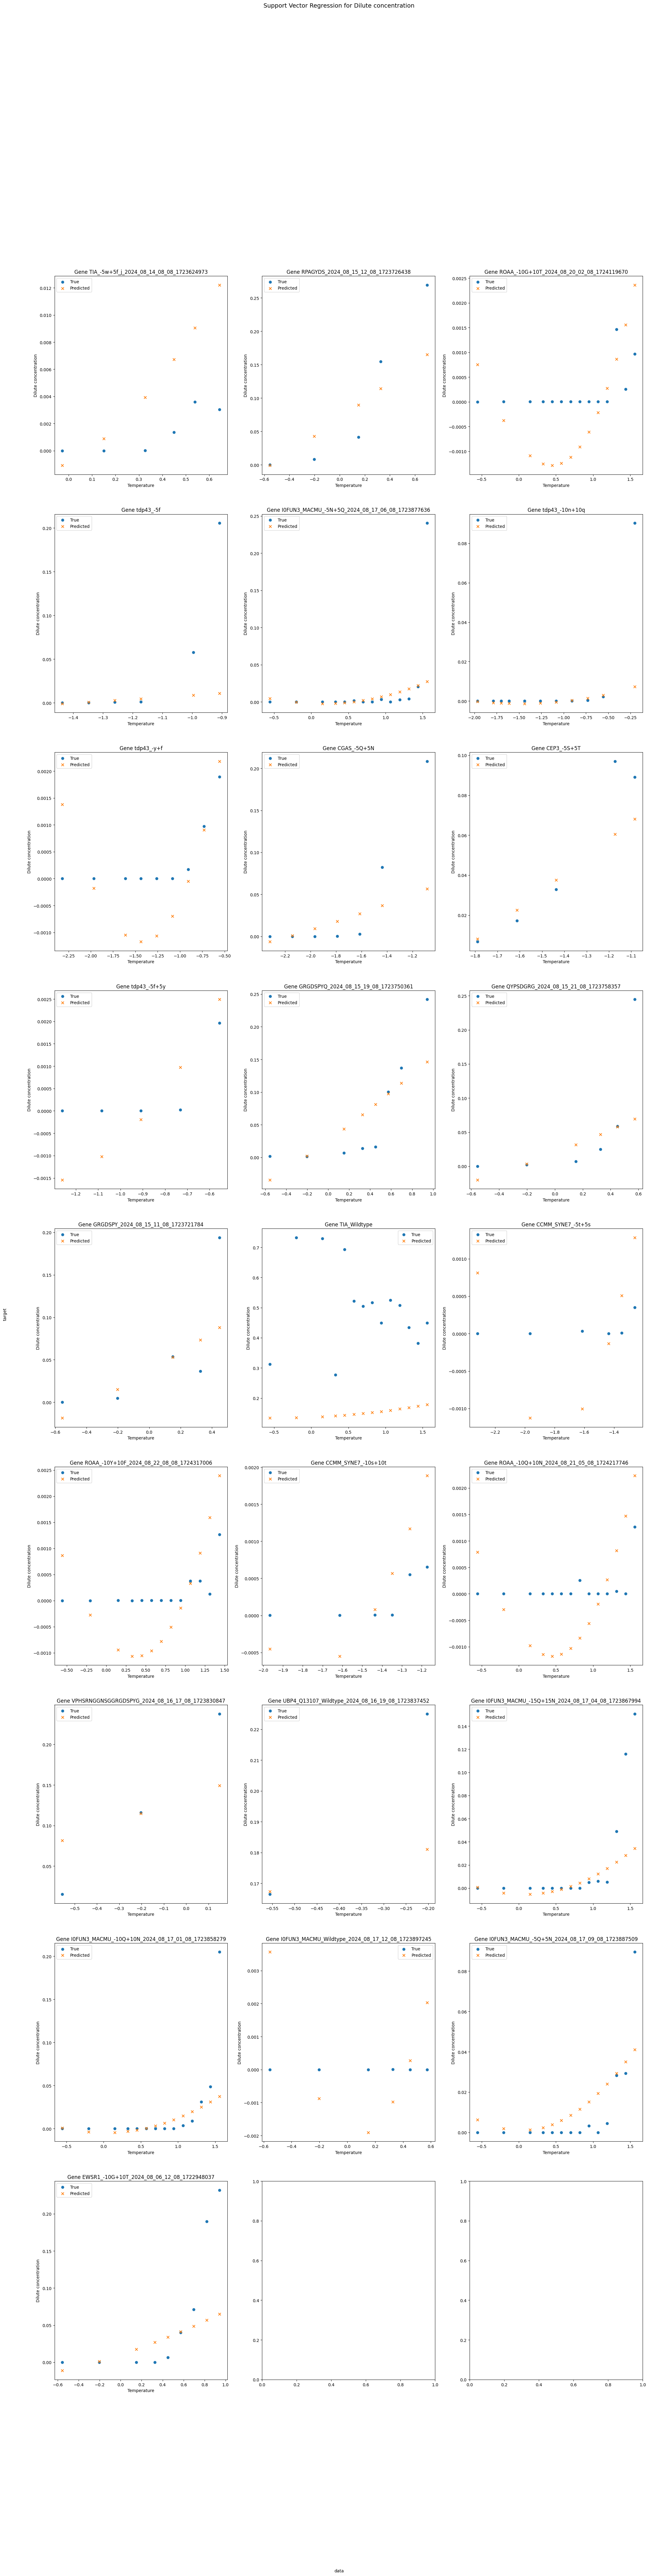

In [45]:
plot_tests_d(svr_rbf, Train, train_genes, shr_cols)

In [42]:
data_df_ext_scaled.columns

Index(['gene', 'arginine_count(C)', 'molecular_weight(BP)',
       'isoelectric_pint(BP)', 'aromaticity(BP)', 'net_charge(BP)',
       'hydropathy_index(BP)', 'length(BP)', 'instability_index(BP)',
       'fraction_of_charged_residues(S)', 'fraction_of_positive_residues(S)',
       'fraction_of_negative_residues(S)', 'net_charge_per_residue(S)',
       'sequence_charge_decoration_1(S)', 'sequence_charge_decoration_2(S)',
       'fraction_aliphatic(S)', 'fraction_polar(S)', 'fraction_proline(S)',
       'complexity(S)', 'hydrophobicity(S)',
       'compute_iwd_charged_weighted_+(S)',
       'compute_iwd_charged_weighted_-(S)',
       'compute_bivariate_iwd_charged_weighted(S)', 'radius_of_gyration(SP)',
       'end_to_end_distance(SP)', 'asphericity(SP)', 'scaling_exponent(SP)',
       'prefactor(SP)', 'ct', 'temp', 'dilute_conc', 'dense_conc',
       'var_dilute', 'var_dense'],
      dtype='object')

In [43]:
# data_df_ext_scaled.loc[:, data_df_ext_scaled.columns not in ['temp', 'dilute_conc', 'dense_conc', 'var_dilute', 'var_dense']].drop_duplicates()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [44]:
data_df_ext_scaled.drop(['temp', 'dilute_conc', 'dense_conc', 'var_dilute', 'var_dense'], axis=1).drop_duplicates()

,gene,arginine_count(C),molecular_weight(BP),isoelectric_pint(BP),aromaticity(BP),net_charge(BP),hydropathy_index(BP),length(BP),instability_index(BP),fraction_of_charged_residues(S),...,hydrophobicity(S),compute_iwd_charged_weighted_+(S),compute_iwd_charged_weighted_-(S),compute_bivariate_iwd_charged_weighted(S),radius_of_gyration(SP),end_to_end_distance(SP),asphericity(SP),scaling_exponent(SP),prefactor(SP),ct
0,CCMM_SYNE7_-10s+10t,1.635114,-1.747450,1.178113,-0.402507,0.693159,0.538019,81,-0.957694,0.172840,...,3.897531,0.327494,-0.179558,0.277219,-0.616207,62.526837,0.416176,0.539948,6.696292,236.99
6,CCMM_SYNE7_-5t+5s,1.635114,-1.887801,1.178113,-0.402507,0.693159,0.440732,81,2.114935,0.172840,...,3.879012,0.327494,-0.179558,0.277219,-0.699267,61.420351,0.411728,0.534922,6.699540,240.22
12,CEP3_-5S+5T,1.779019,-0.656299,-1.943627,-0.664023,-1.634366,0.167924,96,0.810862,0.250000,...,3.827083,0.276324,4.126696,0.237208,-0.024289,69.188867,0.397392,0.504037,7.261065,228.94
17,CGAS_-5Q+5N,1.685888,2.486454,1.588012,-1.530291,3.041229,-1.656175,149,0.730638,0.248322,...,3.479866,0.439018,0.251281,0.429047,2.669992,96.095975,0.454736,0.565227,6.320051,216.44
24,tdp43_-10n+10q,-0.559533,0.343157,0.137278,-0.075997,-0.242636,0.710317,122,0.486285,0.040984,...,3.930328,0.000975,-0.297614,0.001459,0.154813,68.328503,0.401332,0.513806,6.651470,270.49
35,tdp43_-10q+10n,-0.559533,0.183407,0.137278,-0.075997,-0.242636,0.594052,122,-1.658670,0.040984,...,3.908197,0.000975,-0.297614,0.001459,0.198546,69.078411,0.404668,0.521679,6.506517,276.74
42,tdp43_-15n+15q,-0.559533,0.389941,0.137278,-0.075997,-0.242636,0.710317,122,1.236691,0.040984,...,3.930328,0.000975,-0.297614,0.001459,0.133924,68.007589,0.399988,0.510904,6.694836,269.57
50,tdp43_-20q+20n,-0.559533,0.249590,0.137278,-0.075997,-0.242636,0.710317,122,-0.837439,0.040984,...,3.930328,0.000975,-0.297614,0.001459,0.192134,68.795719,0.404366,0.519387,6.548600,273.71
58,tdp43_-5f,-0.559533,-0.010941,0.137278,-1.187227,-0.242636,-0.013112,122,-0.498759,0.040984,...,3.792623,0.000975,-0.297614,0.001459,0.482540,72.575324,0.416566,0.540646,6.176755,234.82
64,tdp43_-5f+5y,-0.559533,0.302953,-0.043680,-0.075997,-0.244024,-0.172439,122,-0.972772,0.040984,...,3.762295,0.000975,-0.297614,0.001459,0.142883,68.013583,0.401143,0.514865,6.605451,271.00


In [75]:
genelist = data_df_ext_scaled["gene"].unique()
Train, Test = train_test_split(genelist, train_size=0.8, random_state=1, shuffle=True)

train_genes = copy.deepcopy(Train)
test_genes = copy.deepcopy(Test)

data_df_ext_scaled_ct = data_df_ext_scaled.copy(deep=True)

data_df_ext_scaled_ct = data_df_ext_scaled_ct.drop(['temp', 'dilute_conc', 'dense_conc', 'var_dilute', 'var_dense'], axis=1).drop_duplicates()

Train = data_df_ext_scaled_ct[data_df_ext_scaled_ct['gene'].isin(Train)]
Test = data_df_ext_scaled_ct[data_df_ext_scaled_ct['gene'].isin(Test)]

X_train = Train[shr_cols]
X_test = Test[shr_cols]
y_train = Train["ct"]
y_test = Test["ct"]

In [76]:
X_test

,arginine_count(C),molecular_weight(BP),isoelectric_pint(BP),aromaticity(BP),net_charge(BP),hydropathy_index(BP),instability_index(BP),sequence_charge_decoration_1(S),sequence_charge_decoration_2(S),fraction_aliphatic(S),fraction_polar(S),fraction_proline(S),complexity(S),compute_iwd_charged_weighted_+(S),compute_iwd_charged_weighted_-(S),compute_bivariate_iwd_charged_weighted(S),radius_of_gyration(SP),scaling_exponent(SP),prefactor(SP)
17,1.577303,-0.161168,-1.306198,-1.524963,-1.738746,1.035657,1.506047,-2.408081,-0.355532,0.870722,-2.505843,0.712264,2.200879,1.265884,5.139028,1.857996,0.726434,0.801525,-0.724766
160,0.314914,0.331083,0.923321,1.127789,1.202602,-1.414923,-0.925007,0.804828,-0.086367,-1.265074,0.528770,-0.839453,0.515110,1.188596,-0.188279,0.410995,-0.486554,-1.192177,0.276930
174,0.314914,0.119795,1.274074,1.127789,1.206979,0.087043,0.001275,0.804828,0.077088,-1.265074,0.528770,-0.839453,0.137155,1.188596,-0.188279,0.410995,-0.552215,-1.127125,0.219666
203,-0.678441,0.150547,0.502916,-1.115717,-0.275434,1.249780,-1.339043,-0.318281,0.335023,1.093096,0.939851,-1.320050,-0.832260,-0.715896,-0.235727,-0.699485,0.898633,1.023671,-1.150795
210,-0.678441,0.223170,0.502916,-1.115717,-0.275434,1.304677,0.964992,-0.318281,0.537907,1.093096,0.939851,-1.320050,-0.822991,-0.715896,-0.235727,-0.699485,0.852605,0.896503,-1.043901
218,-0.678441,0.173819,0.502916,-1.115717,-0.275434,1.304677,-0.685533,-0.318281,0.422040,1.093096,0.939851,-1.320050,-0.267376,-0.715896,-0.235727,-0.699485,0.894066,0.996627,-1.126908
246,-0.834802,-0.112594,-1.040099,0.410309,-0.645762,0.582467,0.122629,-0.338345,0.488233,0.481427,-0.176170,0.685588,0.353563,-0.722914,-0.235727,-0.444103,-0.012672,-0.048387,0.378948


In [77]:
svr_rbf = SVR(C=100, coef0=0.01, epsilon=0.001, gamma='auto', max_iter=10000)
svr_rbf.fit(X_train, y_train)

SVR(C=100, coef0=0.01, epsilon=0.001, gamma='auto', max_iter=10000)

In [78]:
svr_rbf.score(X_train, y_train)

0.9887601866191991

In [79]:
svr_rbf.score(X_test, y_test)

0.9821591667566756

In [80]:
svr_rbf.predict(X_test)

array([251.49247644, 391.29350057, 381.75598791, 264.06632188,
       273.20689317, 266.34261579, 347.57723675])

In [81]:
X_test

,arginine_count(C),molecular_weight(BP),isoelectric_pint(BP),aromaticity(BP),net_charge(BP),hydropathy_index(BP),instability_index(BP),sequence_charge_decoration_1(S),sequence_charge_decoration_2(S),fraction_aliphatic(S),fraction_polar(S),fraction_proline(S),complexity(S),compute_iwd_charged_weighted_+(S),compute_iwd_charged_weighted_-(S),compute_bivariate_iwd_charged_weighted(S),radius_of_gyration(SP),scaling_exponent(SP),prefactor(SP)
17,1.577303,-0.161168,-1.306198,-1.524963,-1.738746,1.035657,1.506047,-2.408081,-0.355532,0.870722,-2.505843,0.712264,2.200879,1.265884,5.139028,1.857996,0.726434,0.801525,-0.724766
160,0.314914,0.331083,0.923321,1.127789,1.202602,-1.414923,-0.925007,0.804828,-0.086367,-1.265074,0.528770,-0.839453,0.515110,1.188596,-0.188279,0.410995,-0.486554,-1.192177,0.276930
174,0.314914,0.119795,1.274074,1.127789,1.206979,0.087043,0.001275,0.804828,0.077088,-1.265074,0.528770,-0.839453,0.137155,1.188596,-0.188279,0.410995,-0.552215,-1.127125,0.219666
203,-0.678441,0.150547,0.502916,-1.115717,-0.275434,1.249780,-1.339043,-0.318281,0.335023,1.093096,0.939851,-1.320050,-0.832260,-0.715896,-0.235727,-0.699485,0.898633,1.023671,-1.150795
210,-0.678441,0.223170,0.502916,-1.115717,-0.275434,1.304677,0.964992,-0.318281,0.537907,1.093096,0.939851,-1.320050,-0.822991,-0.715896,-0.235727,-0.699485,0.852605,0.896503,-1.043901
218,-0.678441,0.173819,0.502916,-1.115717,-0.275434,1.304677,-0.685533,-0.318281,0.422040,1.093096,0.939851,-1.320050,-0.267376,-0.715896,-0.235727,-0.699485,0.894066,0.996627,-1.126908
246,-0.834802,-0.112594,-1.040099,0.410309,-0.645762,0.582467,0.122629,-0.338345,0.488233,0.481427,-0.176170,0.685588,0.353563,-0.722914,-0.235727,-0.444103,-0.012672,-0.048387,0.378948


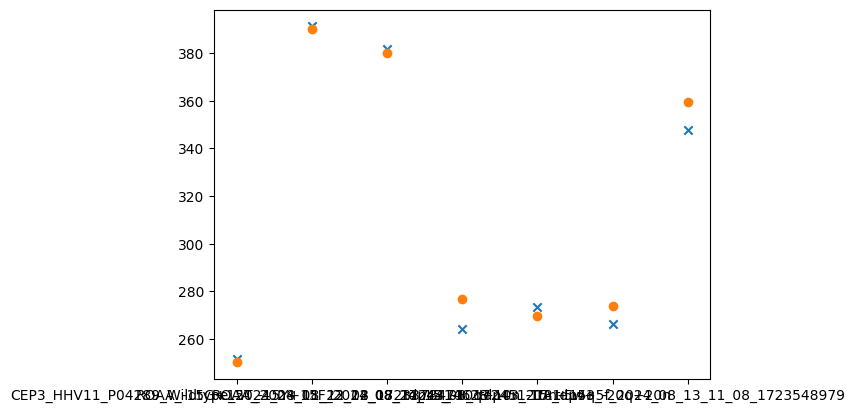

In [82]:
plt.scatter(Test['gene'], svr_rbf.predict(X_test), marker='x')
plt.scatter(Test['gene'], y_test, marker='o')

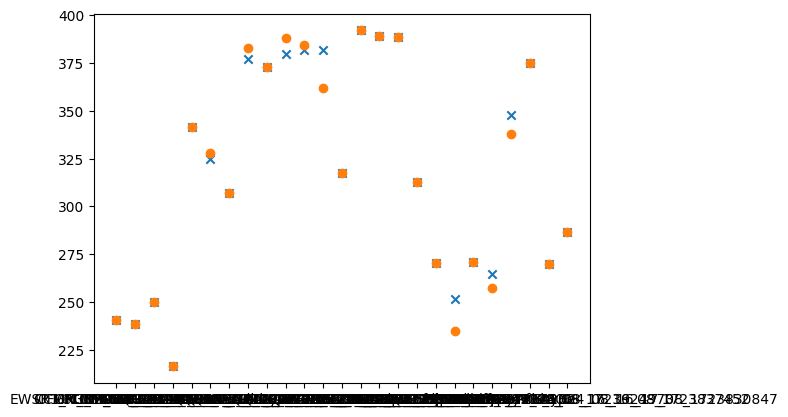

In [83]:
plt.scatter(Train['gene'], svr_rbf.predict(X_train), marker='x')
plt.scatter(Train['gene'], y_train, marker='o')
plt.savefig('ct.png')

# DIGNON

In [69]:
cfg = functions.load_cfg("configs/features_config.json")
#seq  = functions._load_seq_from_file("seq.txt")


In [74]:
data_dignon_df = pd.read_csv("data/dignon.csv")
data_dignon_df

,protein,seq,tc
0,FUS_WT,MASNDYTQQATQSYGAYPTQPGQGYSQQSSQPYGQQSYSGYSQSTD...,359.1
1,FUS_6E,MASNDYTQQATQSYGAYPTQPGQGYEQQSEQPYGQQSYSGYSQSTD...,338.9
2,FUS_6E’,MASNDYTQQATQSYGAYPEQPGQGYEQQSEQPYGQQSYSGYEQSTD...,339.5
3,FUS_6E*,MASNDYEQQATQSYGAYPTQPGQGYEQQSSQPYGQQSYSGYSQSTD...,338.6
4,FUS_12E,MASNDYEQQAEQSYGAYPEQPGQGYEQQSEQPYGQQSYSGYEQSTD...,290.0
5,FUS_40(2),MASNDYTQQATQSYGAYPTQPGQGYSQQSSQPYGQQSYSG,348.8
6,FUS_YtoF,MASNDFTQQATQSFGAFPTQPGQGFSQQSSQPFGQQSFSGFSQSTD...,372.0
7,hnRNPA2_WT,GRGGNFGFGDSRGGGGNFGPGPGSNFRGGSDGYGSGRGFGDGYNGY...,315.2
8,hnRNPA2_D290V,GRGGNFGFGDSRGGGGNFGPGPGSNFRGGSDGYGSGRGFGDGYNGY...,311.5
9,hnRNPA2_P298L,GRGGNFGFGDSRGGGGNFGPGPGSNFRGGSDGYGSGRGFGDGYNGY...,315.4


In [75]:
from libs.functions import calculate_features_from_seqs, load_cfg

In [76]:
seqs = {}
for i, row in data_dignon_df[["protein", "seq"]].iterrows():
    seqs[row["protein"]] = row["seq"]
features = calculate_features_from_seqs(seqs, cfg)
features

{'FUS_WT': {'seq': 'MASNDYTQQATQSYGAYPTQPGQGYSQQSSQPYGQQSYSGYSQSTDTSGYGQSSYSSYGQSQNTGYGTQSTPQGYGSTGGYGSSQSSQSSYGQQSSYPGYGQQPAPSSTSGSYGSSSQSSSYGQPQSGSYSQQPSYGGQQQSYGQQQSYNPPQGYGQQNQYNS',
  'features': {'CUSTOM': {'arginine_count': 0.0},
   'BIOPYTHON': {'molecular_weight': 17168.085799999983,
    'isoelectric_pint': 4.0500284194946286,
    'aromaticity': 0.147239263803681,
    'net_charge': -2.52137981455499,
    'hydropathy_index': -1.503680981595094,
    'length': 163,
    'composition': {'A': 0.024539877300613498,
     'C': 0.0,
     'D': 0.012269938650306749,
     'E': 0.0,
     'F': 0.0,
     'G': 0.1656441717791411,
     'H': 0.0,
     'I': 0.0,
     'K': 0.0,
     'L': 0.0,
     'M': 0.006134969325153374,
     'N': 0.03067484662576687,
     'P': 0.06748466257668712,
     'Q': 0.22699386503067484,
     'R': 0.0,
     'S': 0.25766871165644173,
     'T': 0.06134969325153374,
     'V': 0.0,
     'W': 0.0,
     'Y': 0.147239263803681},
    'flexibility': [0.9892619047619049,
     1.02

In [77]:
data_dignon_df_f = data_loading_generated._generate_df(features, temp_inc=False, ct=False, dens_raw=False)
data_dignon_df = data_dignon_df_f.reset_index(names="gene_name").join(data_dignon_df['tc'])
data_dignon_df = data_dignon_df.rename(columns={"gene_name": "gene"})
data_dignon_df

,gene,seq,arginine_count(C),molecular_weight(BP),isoelectric_pint(BP),aromaticity(BP),net_charge(BP),hydropathy_index(BP),length(BP),composition(BP),...,hydrophobicity(S),compute_iwd_charged_weighted_+(S),compute_iwd_charged_weighted_-(S),compute_bivariate_iwd_charged_weighted(S),radius_of_gyration(SP),end_to_end_distance(SP),asphericity(SP),scaling_exponent(SP),prefactor(SP),tc
0,FUS_WT,MASNDYTQQATQSYGAYPTQPGQGYSQQSSQPYGQQSYSGYSQSTD...,0.000000,17168.0858,4.050028,0.147239,-2.521380,-1.503681,163,"{'A': 0.024539877300613498, 'C': 0.0, 'D': 0.0...",...,2.996319,0.000000,0.003049,0.000000,28.691842,62.312388,0.316236,0.390625,9.097462,359.1
1,FUS_6E,MASNDYTQQATQSYGAYPTQPGQGYEQQSEQPYGQQSYSGYSQSTD...,0.000000,17406.2794,4.050028,0.147239,-8.504517,-1.603681,163,"{'A': 0.024539877300613498, 'C': 0.0, 'D': 0.0...",...,2.896319,0.000000,0.063055,0.000000,29.365542,62.764466,0.324936,0.401427,9.034252,338.9
2,FUS_6E’,MASNDYTQQATQSYGAYPEQPGQGYEQQSEQPYGQQSYSGYEQSTD...,0.000000,17406.2794,4.050028,0.147239,-8.504517,-1.603681,163,"{'A': 0.024539877300613498, 'C': 0.0, 'D': 0.0...",...,2.896319,0.000000,0.069047,0.000000,29.409548,62.616635,0.325317,0.397993,9.151751,339.5
3,FUS_6E*,MASNDYEQQATQSYGAYPTQPGQGYEQQSSQPYGQQSYSGYSQSTD...,0.000000,17406.2794,4.050028,0.147239,-8.504517,-1.603681,163,"{'A': 0.024539877300613498, 'C': 0.0, 'D': 0.0...",...,2.896319,0.000000,0.078111,0.000000,29.178450,62.913369,0.322196,0.400823,9.038077,338.6
4,FUS_12E,MASNDYEQQAEQSYGAYPEQPGQGYEQQSEQPYGQQSYSGYEQSTD...,0.000000,17616.4198,4.050028,0.147239,-14.487654,-1.704908,163,"{'A': 0.024539877300613498, 'C': 0.0, 'D': 0.0...",...,2.795092,0.000000,0.130270,0.000000,30.140038,64.124333,0.335788,0.412371,8.890516,290.0
5,FUS_40(2),MASNDYTQQATQSYGAYPTQPGQGYSQQSSQPYGQQSYSG,0.000000,4341.4211,4.050028,0.150000,-1.504519,-1.425000,40,"{'A': 0.075, 'C': 0.0, 'D': 0.025, 'E': 0.0, '...",...,3.075000,0.000000,0.000000,0.000000,16.419316,37.910542,0.415278,0.511180,7.138429,348.8
6,FUS_YtoF,MASNDFTQQATQSFGAFPTQPGQGFSQQSSQPFGQQSFSGFSQSTD...,0.000000,16784.1002,4.050028,0.147239,-2.497404,-0.900000,163,"{'A': 0.024539877300613498, 'C': 0.0, 'D': 0.0...",...,3.600000,0.000000,0.003049,0.000000,30.478562,67.392175,0.335952,0.432709,8.434603,372.0
7,hnRNPA2_WT,GRGGNFGFGDSRGGGGNFGPGPGSNFRGGSDGYGSGRGFGDGYNGY...,0.052632,14364.4729,9.300934,0.164474,3.747643,-1.132895,152,"{'A': 0.0, 'C': 0.0, 'D': 0.03289473684210526,...",...,3.367105,0.053267,0.005935,0.054520,26.507752,57.704486,0.300078,0.411416,8.054133,315.2
8,hnRNPA2_D290V,GRGGNFGFGDSRGGGGNFGPGPGSNFRGGSDGYGSGRGFGDGYNGY...,0.052632,14348.5165,9.454305,0.164474,4.746523,-1.082237,152,"{'A': 0.0, 'C': 0.0, 'D': 0.02631578947368421,...",...,3.417763,0.053267,0.001643,0.052898,26.586690,57.989516,0.301565,0.414323,8.029727,311.5
9,hnRNPA2_P298L,GRGGNFGFGDSRGGGGNFGPGPGSNFRGGSDGYGSGRGFGDGYNGY...,0.052632,14380.5153,9.300934,0.164474,3.747643,-1.097368,152,"{'A': 0.0, 'C': 0.0, 'D': 0.03289473684210526,...",...,3.402632,0.053267,0.005935,0.054520,26.315537,57.321315,0.299283,0.408670,8.023952,315.4


In [78]:
columns_to_drop = []
for column_name in data_dignon_df.columns:
    if not isinstance(data_dignon_df.iloc[0][column_name], np.number) and column_name != "seq" and  not column_name.endswith("_T") and column_name != "gene":
        columns_to_drop.append(column_name)
data_dignon_df = data_dignon_df.drop(labels=columns_to_drop, axis=1)
data_dignon_df

,gene,seq,arginine_count(C),molecular_weight(BP),isoelectric_pint(BP),aromaticity(BP),net_charge(BP),hydropathy_index(BP),length(BP),instability_index(BP),...,hydrophobicity(S),compute_iwd_charged_weighted_+(S),compute_iwd_charged_weighted_-(S),compute_bivariate_iwd_charged_weighted(S),radius_of_gyration(SP),end_to_end_distance(SP),asphericity(SP),scaling_exponent(SP),prefactor(SP),tc
0,FUS_WT,MASNDYTQQATQSYGAYPTQPGQGYSQQSSQPYGQQSYSGYSQSTD...,0.000000,17168.0858,4.050028,0.147239,-2.521380,-1.503681,163,84.995706,...,2.996319,0.000000,0.003049,0.000000,28.691842,62.312388,0.316236,0.390625,9.097462,359.1
1,FUS_6E,MASNDYTQQATQSYGAYPTQPGQGYEQQSEQPYGQQSYSGYSQSTD...,0.000000,17406.2794,4.050028,0.147239,-8.504517,-1.603681,163,86.235583,...,2.896319,0.000000,0.063055,0.000000,29.365542,62.764466,0.324936,0.401427,9.034252,338.9
2,FUS_6E’,MASNDYTQQATQSYGAYPEQPGQGYEQQSEQPYGQQSYSGYEQSTD...,0.000000,17406.2794,4.050028,0.147239,-8.504517,-1.603681,163,85.266871,...,2.896319,0.000000,0.069047,0.000000,29.409548,62.616635,0.325317,0.397993,9.151751,339.5
3,FUS_6E*,MASNDYEQQATQSYGAYPTQPGQGYEQQSSQPYGQQSYSGYSQSTD...,0.000000,17406.2794,4.050028,0.147239,-8.504517,-1.603681,163,85.773006,...,2.896319,0.000000,0.078111,0.000000,29.178450,62.913369,0.322196,0.400823,9.038077,338.6
4,FUS_12E,MASNDYEQQAEQSYGAYPEQPGQGYEQQSEQPYGQQSYSGYEQSTD...,0.000000,17616.4198,4.050028,0.147239,-14.487654,-1.704908,163,89.853374,...,2.795092,0.000000,0.130270,0.000000,30.140038,64.124333,0.335788,0.412371,8.890516,290.0
5,FUS_40(2),MASNDYTQQATQSYGAYPTQPGQGYSQQSSQPYGQQSYSG,0.000000,4341.4211,4.050028,0.150000,-1.504519,-1.425000,40,71.127500,...,3.075000,0.000000,0.000000,0.000000,16.419316,37.910542,0.415278,0.511180,7.138429,348.8
6,FUS_YtoF,MASNDFTQQATQSFGAFPTQPGQGFSQQSSQPFGQQSFSGFSQSTD...,0.000000,16784.1002,4.050028,0.147239,-2.497404,-0.900000,163,98.543558,...,3.600000,0.000000,0.003049,0.000000,30.478562,67.392175,0.335952,0.432709,8.434603,372.0
7,hnRNPA2_WT,GRGGNFGFGDSRGGGGNFGPGPGSNFRGGSDGYGSGRGFGDGYNGY...,0.052632,14364.4729,9.300934,0.164474,3.747643,-1.132895,152,23.348026,...,3.367105,0.053267,0.005935,0.054520,26.507752,57.704486,0.300078,0.411416,8.054133,315.2
8,hnRNPA2_D290V,GRGGNFGFGDSRGGGGNFGPGPGSNFRGGSDGYGSGRGFGDGYNGY...,0.052632,14348.5165,9.454305,0.164474,4.746523,-1.082237,152,23.844079,...,3.417763,0.053267,0.001643,0.052898,26.586690,57.989516,0.301565,0.414323,8.029727,311.5
9,hnRNPA2_P298L,GRGGNFGFGDSRGGGGNFGPGPGSNFRGGSDGYGSGRGFGDGYNGY...,0.052632,14380.5153,9.300934,0.164474,3.747643,-1.097368,152,20.813816,...,3.402632,0.053267,0.005935,0.054520,26.315537,57.321315,0.299283,0.408670,8.023952,315.4


In [79]:
data_dignon_df = data_dignon_df.rename(columns={"tc": "ct"})

In [80]:
data_df_merged = pd.concat([data_dignon_df[shr_cols + ['ct', 'gene']], data_df_ext[shr_cols + ['ct', 'gene']]]).drop_duplicates()
data_df_merged = data_df_merged.reset_index()
data_df_merged

,index,arginine_count(C),molecular_weight(BP),isoelectric_pint(BP),aromaticity(BP),net_charge(BP),hydropathy_index(BP),instability_index(BP),fraction_of_negative_residues(S),sequence_charge_decoration_2(S),fraction_proline(S),complexity(S),compute_iwd_charged_weighted_-(S),radius_of_gyration(SP),ct,gene
0,0,0.000000,17168.0858,4.050028,0.147239,-2.521380,-1.503681,84.995706,0.012270,4.825202,0.067485,0.634958,0.003049,28.691842,359.10,FUS_WT
1,1,0.000000,17406.2794,4.050028,0.147239,-8.504517,-1.603681,86.235583,0.049080,4.782605,0.067485,0.667476,0.063055,29.365542,338.90,FUS_6E
2,2,0.000000,17406.2794,4.050028,0.147239,-8.504517,-1.603681,85.266871,0.049080,4.783890,0.067485,0.667476,0.069047,29.409548,339.50,FUS_6E’
3,3,0.000000,17406.2794,4.050028,0.147239,-8.504517,-1.603681,85.773006,0.049080,4.785000,0.067485,0.667476,0.078111,29.178450,338.60,FUS_6E*
4,4,0.000000,17616.4198,4.050028,0.147239,-14.487654,-1.704908,89.853374,0.085890,4.737180,0.067485,0.674979,0.130270,30.140038,290.00,FUS_12E
5,5,0.000000,4341.4211,4.050028,0.150000,-1.504519,-1.425000,71.127500,0.025000,3.070443,0.075000,0.686165,0.000000,16.419316,348.80,FUS_40(2)
6,6,0.000000,16784.1002,4.050028,0.147239,-2.497404,-0.900000,98.543558,0.012270,4.971483,0.067485,0.634958,0.003049,30.478562,372.00,FUS_YtoF
7,7,0.052632,14364.4729,9.300934,0.164474,3.747643,-1.132895,23.348026,0.032895,4.657105,0.059211,0.599228,0.005935,26.507752,315.20,hnRNPA2_WT
8,8,0.052632,14348.5165,9.454305,0.164474,4.746523,-1.082237,23.844079,0.026316,4.683164,0.059211,0.604723,0.001643,26.586690,311.50,hnRNPA2_D290V
9,9,0.052632,14380.5153,9.300934,0.164474,3.747643,-1.097368,20.813816,0.032895,4.655752,0.052632,0.606123,0.005935,26.315537,315.40,hnRNPA2_P298L


In [81]:
y_column = 'ct'
    
#x_columns = [cn for cn in data_df.columns if cn not in ['seq', 'tc']]

In [82]:
scaler.fit(data_df_merged[shr_cols])


StandardScaler()

In [83]:
shr_cols

['arginine_count(C)',
 'molecular_weight(BP)',
 'isoelectric_pint(BP)',
 'aromaticity(BP)',
 'net_charge(BP)',
 'hydropathy_index(BP)',
 'instability_index(BP)',
 'fraction_of_negative_residues(S)',
 'sequence_charge_decoration_2(S)',
 'fraction_proline(S)',
 'complexity(S)',
 'compute_iwd_charged_weighted_-(S)',
 'radius_of_gyration(SP)']

In [84]:
data_df_merged[shr_cols] = scaler.transform(data_df_merged[shr_cols])
data_df_merged

,index,arginine_count(C),molecular_weight(BP),isoelectric_pint(BP),aromaticity(BP),net_charge(BP),hydropathy_index(BP),instability_index(BP),fraction_of_negative_residues(S),sequence_charge_decoration_2(S),fraction_proline(S),complexity(S),compute_iwd_charged_weighted_-(S),radius_of_gyration(SP),ct,gene
0,0,-0.914203,1.052708,-1.491289,1.026877,-0.500348,-0.924858,1.380532,-0.903869,1.067965,0.293719,-0.982256,-0.438449,-0.046887,359.10,FUS_WT
1,1,-0.914203,1.124764,-1.491289,1.026877,-1.623785,-1.146366,1.428202,-0.013338,0.968912,0.293719,-0.589682,0.005679,0.128465,338.90,FUS_6E
2,2,-0.914203,1.124764,-1.491289,1.026877,-1.623785,-1.146366,1.390958,-0.013338,0.971902,0.293719,-0.589682,0.050026,0.139919,339.50,FUS_6E’
3,3,-0.914203,1.124764,-1.491289,1.026877,-1.623785,-1.146366,1.410417,-0.013338,0.974481,0.293719,-0.589682,0.117117,0.079768,338.60,FUS_6E*
4,4,-0.914203,1.188334,-1.491289,1.026877,-2.747222,-1.370593,1.567297,0.877193,0.863288,0.293719,-0.499098,0.503160,0.330052,290.00,FUS_12E
5,5,-0.914203,-2.827525,-1.491289,1.088011,-0.309414,-0.750573,0.847335,-0.595894,-3.012372,0.481780,-0.364050,-0.461014,-3.241200,348.80,FUS_40(2)
6,6,-0.914203,0.936547,-1.491289,1.026877,-0.495846,0.412346,1.901412,-0.903869,1.408110,0.293719,-0.982256,-0.438449,0.418164,372.00,FUS_YtoF
7,7,0.102306,0.204578,0.673147,1.408517,0.676770,-0.103535,-0.989663,-0.404898,0.677088,0.086671,-1.413619,-0.417090,-0.615365,315.20,hnRNPA2_WT
8,8,0.102306,0.199751,0.736366,1.408517,0.864327,0.008676,-0.970591,-0.564061,0.737683,0.086671,-1.347283,-0.448852,-0.594819,311.50,hnRNPA2_D290V
9,9,0.102306,0.209431,0.673147,1.408517,0.676770,-0.024842,-1.087097,-0.404898,0.673943,-0.077958,-1.330382,-0.417090,-0.665395,315.40,hnRNPA2_P298L


In [85]:
genelist = data_df_merged["gene"].unique()
Train, Test = train_test_split(genelist, train_size=0.8, random_state=1, shuffle=True)

train_genes = copy.deepcopy(Train)
test_genes = copy.deepcopy(Test)

#data_df_ext_scaled_ct = data_df_ext_scaled.copy(deep=True)

#data_df_ext_scaled_ct = data_df_ext_scaled_ct.drop(['temp', 'dilute_conc', 'dense_conc', 'var_dilute', 'var_dense'], axis=1).drop_duplicates()

Train = data_df_merged[data_df_merged['gene'].isin(Train)]
Test = data_df_merged[data_df_merged['gene'].isin(Test)]

X_train = Train[shr_cols]
X_test = Test[shr_cols]
y_train = Train["ct"]
y_test = Test["ct"]

In [86]:
X_train

,arginine_count(C),molecular_weight(BP),isoelectric_pint(BP),aromaticity(BP),net_charge(BP),hydropathy_index(BP),instability_index(BP),fraction_of_negative_residues(S),sequence_charge_decoration_2(S),fraction_proline(S),complexity(S),compute_iwd_charged_weighted_-(S),radius_of_gyration(SP)
0,-0.914203,1.052708,-1.491289,1.026877,-0.500348,-0.924858,1.380532,-0.903869,1.067965,0.293719,-0.982256,-0.438449,-0.046887
1,-0.914203,1.124764,-1.491289,1.026877,-1.623785,-1.146366,1.428202,-0.013338,0.968912,0.293719,-0.589682,0.005679,0.128465
2,-0.914203,1.124764,-1.491289,1.026877,-1.623785,-1.146366,1.390958,-0.013338,0.971902,0.293719,-0.589682,0.050026,0.139919
4,-0.914203,1.188334,-1.491289,1.026877,-2.747222,-1.370593,1.567297,0.877193,0.863288,0.293719,-0.499098,0.503160,0.330052
5,-0.914203,-2.827525,-1.491289,1.088011,-0.309414,-0.750573,0.847335,-0.595894,-3.012372,0.481780,-0.364050,-0.461014,-3.241200
6,-0.914203,0.936547,-1.491289,1.026877,-0.495846,0.412346,1.901412,-0.903869,1.408110,0.293719,-0.982256,-0.438449,0.418164
7,0.102306,0.204578,0.673147,1.408517,0.676770,-0.103535,-0.989663,-0.404898,0.677088,0.086671,-1.413619,-0.417090,-0.615365
8,0.102306,0.199751,0.736366,1.408517,0.864327,0.008676,-0.970591,-0.564061,0.737683,0.086671,-1.347283,-0.448852,-0.594819
9,0.102306,0.209431,0.673147,1.408517,0.676770,-0.024842,-1.087097,-0.404898,0.673943,-0.077958,-1.330382,-0.417090,-0.665395
11,1.844892,0.908545,0.778832,-0.651880,0.649758,-1.342580,-0.433061,1.679377,-1.243971,-1.394987,-0.696670,0.423109,0.405875


In [87]:
svr_rbf = SVR(C=100, coef0=0.01, epsilon=0.001, gamma='auto', max_iter=10000)
svr_rbf.fit(X_train, y_train)

SVR(C=100, coef0=0.01, epsilon=0.001, gamma='auto', max_iter=10000)

In [88]:
svr_rbf.score(X_train, y_train)

0.9287161042836898

In [89]:
svr_rbf.score(X_test, y_test)

-0.10954047775802467

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'FUS_6E*'),
  Text(1, 0, 'LAF-1_IDR_WT'),
  Text(2, 0, 'LAF-1_Shuffle'),
  Text(3, 0, 'CEP3_-5S+5T'),
  Text(4, 0, 'CGAS_-5Q+5N'),
  Text(5, 0, 'tdp43_-5f')])

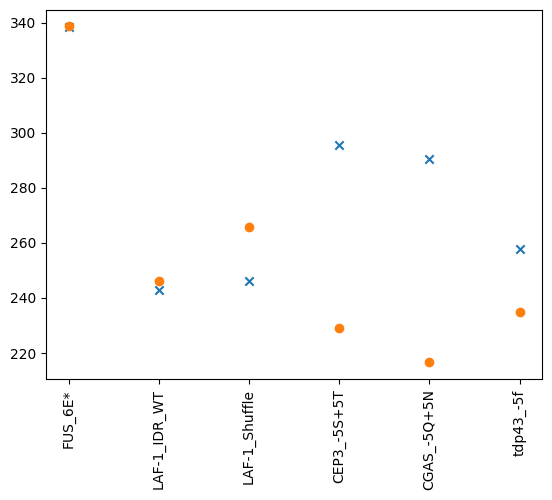

In [90]:
plt.scatter(Test['gene'], svr_rbf.predict(X_test), marker='x')
plt.scatter(Test['gene'], y_test, marker='o')
plt.xticks(rotation=90)

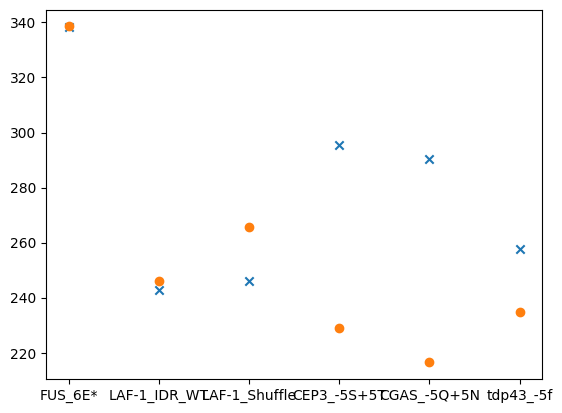

In [91]:
plt.scatter(Test['gene'], svr_rbf.predict(X_test), marker='x')
plt.scatter(Test['gene'], y_test, marker='o')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'FUS_WT'),
  Text(1, 0, 'FUS_6E'),
  Text(2, 0, 'FUS_6E’'),
  Text(3, 0, 'FUS_12E'),
  Text(4, 0, 'FUS_40(2)'),
  Text(5, 0, 'FUS_YtoF'),
  Text(6, 0, 'hnRNPA2_WT'),
  Text(7, 0, 'hnRNPA2_D290V'),
  Text(8, 0, 'hnRNPA2_P298L'),
  Text(9, 0, 'LAF-1_IDR_P24G/P25G'),
  Text(10, 0, 'LAF-1_IDR_scramble(21-28)'),
  Text(11, 0, 'TDP-43_CTD'),
  Text(12, 0, 'CCMM_SYNE7_-10s+10t'),
  Text(13, 0, 'CCMM_SYNE7_-5t+5s'),
  Text(14, 0, 'tdp43_-10n+10q'),
  Text(15, 0, 'tdp43_-10q+10n'),
  Text(16, 0, 'tdp43_-15n+15q'),
  Text(17, 0, 'tdp43_-20q+20n'),
  Text(18, 0, 'tdp43_-5f+5y'),
  Text(19, 0, 'tdp43_-y+f'),
  Text(20, 0, 'TIA_Wildtype')])

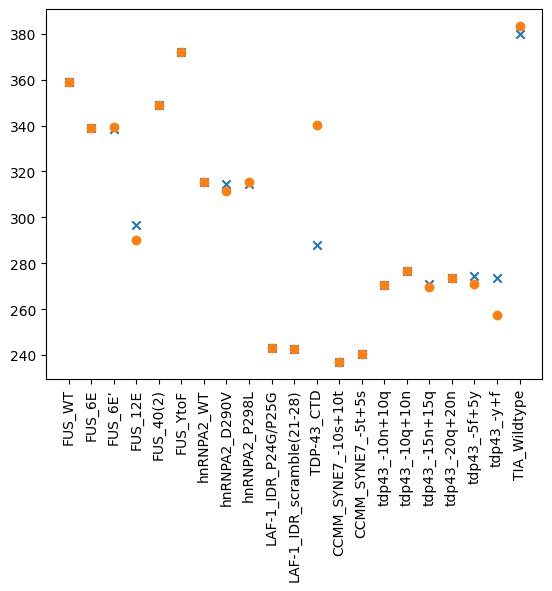

In [92]:
plt.scatter(Train['gene'], svr_rbf.predict(X_train), marker='x')
plt.scatter(Train['gene'], y_train, marker='o')
plt.xticks(rotation=90)